# Predicting Credit Card Request Approval 

# Introduction

In [1]:
NAME = 'final_notebook'
PROJECT = 'predicting_credit_card_approvals'
PYTHON_VERSION = '3.8.3'
AUTHOR = 'Rohan Khurana'

To check the exact python version installed in your system at the time of running this notebook, please run the following code -

``` from platform import python_version
    print(python_version())
```

I have created this project to explore my curiosity and to get a taste of how commercial banks 🏦 accept or reject applications requesting credit cards. Times have changed and today, commercial banks receive a lot of applications for credit cards. At my bank branch, I had inquired as to why credit card applications are rejected and I was provided with a couple of potential reasons like an unusually high number of inquiries on an individual's credit report, high loan balances, and low-income balances to name a few. 

In my understanding, banks are definitely not analyzing these applications manually as it would be a mundane, error-prone, and time-consuming process and in this notebook, I have tried to use the power of machine learning to build an automatic credit card approval using machine learning techniques. 

The dataset we are using for this project is from the UCI Machine Learning Repository and can be downloaded found here - http://archive.ics.uci.edu/ml/datasets/credit+approval 
The dataset can also be found in the project repository. 

The structure of the notebook is as follows - 

* Load and inspect the dataset 
* Explore the numerical and non-numerical features that the notebook has. In addition, as mentioned in the dataset description we have to deal with values having different ranges and the missing values. 
* Preprocess the model to ensure the machine learning model we choose can make good predictions. 
* After preprocessing is complete, we need to do some EDA or Exploratory Data Analysis to build our intuition. 
* Finally we try to build a machine learning model that can predict if an indivisual's application for a credit card will be accepted or not ? 

Data Set Description as Available on http://archive.ics.uci.edu/ml/datasets/credit+approval

1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

8.  Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

9.  Class Distribution  
  
    +: 307 (44.5%)  
    -: 383 (55.5%)  

### Imports 

In [2]:
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

### Loading Data

In [3]:
#  We observe that the data doesn't have header, hence we pass header = None here. 
cc_df = pd.read_csv("data/cc_approvals.data", header = None)  

Observing the first five rows of the dataframe - 
* First observation, the dataset has feature names (or column headers) missing. These are most likely anonymized as we are dealing with sensitive financial information. 
* The data contains a mixture of numerical and non-numerical values. 

In [4]:
cc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


We can observe that the output is a bit incomplete and difficult to comprehend hence I have used <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> to give a pretty good overview of the probable features. 

For ease of analysis, I have assumed the column headers as mentioned in the in the blog. 

From the blog, it can be stated that the probable features in a typical credit card application are as follows -
    
<code>Gender</code>   
<code>Age</code>    
<code>Debt</code>    
<code>Married</code>    
<code>BankCustomer</code>    
<code>EducationLevel</code>    
<code>Ethnicity</code>    
<code>YearsEmployed</code>   
<code>PriorDefault</code>   
<code>Employed</code>    
<code>CreditScore</code>     
<code>DriversLicense</code>    
<code>Citizen</code>    
<code>ZipCode</code>    
<code>Income</code>     
<code>ApprovalStatus</code>   

### Some summary statistics about the dataframe

In [5]:
# Print summary statistics
print(cc_df.describe(include='all'))

print("\n")

# Print DataFrame information 
print(cc_df.info())

print("\n")

# Print missing values in the dataset
cc_df.tail(20)

         0    1           2    3    4    5    6           7    8    9   \
count   690  690  690.000000  690  690  690  690  690.000000  690  690   
unique    3  350         NaN    4    4   15   10         NaN    2    2   
top       b    ?         NaN    u    g    c    v         NaN    t    f   
freq    468   12         NaN  519  519  137  399         NaN  361  395   
mean    NaN  NaN    4.758725  NaN  NaN  NaN  NaN    2.223406  NaN  NaN   
std     NaN  NaN    4.978163  NaN  NaN  NaN  NaN    3.346513  NaN  NaN   
min     NaN  NaN    0.000000  NaN  NaN  NaN  NaN    0.000000  NaN  NaN   
25%     NaN  NaN    1.000000  NaN  NaN  NaN  NaN    0.165000  NaN  NaN   
50%     NaN  NaN    2.750000  NaN  NaN  NaN  NaN    1.000000  NaN  NaN   
75%     NaN  NaN    7.207500  NaN  NaN  NaN  NaN    2.625000  NaN  NaN   
max     NaN  NaN   28.000000  NaN  NaN  NaN  NaN   28.500000  NaN  NaN   

               10   11   12     13             14   15  
count   690.00000  690  690    690     690.000000  690

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


We can observe, we have some '?' as our values. '?', initially we can deal with the question marks by replacing them with NaNs.  

The dataset contains numeric and non-numeric values that are of float64, int64 and object types. Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.  

The dataset also contains values from several ranges. Some features range from 0-28, 0-67 and even 0 - 100000. 

### Handling the missing values 

#### Dealing with numerical data

I am trying to replace the missing values and not completely remove them as it could seriously affect the model performance or we could miss out on some important insights. 

In [6]:
# Checking if we have any missing values in the dataframe. 
print("The number of missing values in the dataframe is :",cc_df.isnull().values.sum())

The number of missing values in the dataframe is : 0


In [7]:
# Replacing "?" with NaN
cc_df = cc_df.replace('?',np.nan)

In [8]:
# Inspecting again if "?" is replaced by NaN or not as we had ? in the last few rows
cc_df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


Now since we have replaced all the '?' values with NaNs we would now need to replace all the newly missing values created with something and we are using the respective column mean values here. The method is called as the <code>mean imputation</code> method.

In [9]:
# Count the number of NaNs in the dataset to verify 
print("The number of missing values in the dataframe is :",cc_df.isnull().values.sum())

The number of missing values in the dataframe is : 67


In [10]:
# Impute the missing values with mean imputation
cc_df.fillna(cc_df.mean(), inplace=True)

Till this point, the mean impuitation strategy is implied for all the numerical data that is present in the dataframe but it won't work in the treatment of missing values present in the columns containing non-numerical values. These columns are 0, 1, 3, 4, 5, 6 and 13. The columns with non-numerical values have the "object" datatype. 

#### Dealing with non-numerical data

In [11]:
print(cc_df.isnull().sum(), cc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    object 
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64 None


In [12]:
d_1 = {}
for col in cc_df.columns:
    d_1[col] = [cc_df[col].isnull().sum(),cc_df[col].dtypes]

In [13]:
dict_df = pd.DataFrame(d_1.items(), columns = ['column_header','number_of_missing_values and column data type'])
dict_df.index = dict_df.index + 1

In [14]:
dict_df

,column_header,number_of_missing_values and column data type
1,0,"[12, object]"
2,1,"[12, object]"
3,2,"[0, float64]"
4,3,"[6, object]"
5,4,"[6, object]"
6,5,"[9, object]"
7,6,"[9, object]"
8,7,"[0, float64]"
9,8,"[0, object]"
10,9,"[0, object]"


We can observe in the above cell that missing values are only present in the columns with data type of 'object' i.e. the non-numerical valued columns.   

So we are going to iterate over all the columns of the dataframe and we are going to replace the missing value with most common non-numerical value in that particular column. 

In [15]:
# Iterate over each column of cc_apps
for col in tqdm(cc_df.columns):
    # Check if the column is of object type
    if cc_df[col].dtypes == 'object':
        cc_df = cc_df.fillna(cc_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print("The number of missing values in the dataframe is :",cc_df.isnull().values.sum())


The number of missing values in the dataframe is : 0


With the above steps, all the missing values are successfully and logically handled.

### Additional preprocessing steps  

The remaining preprocessing steps, before modelling can be applied as follows - 

1. Convert the non-numeric data into numeric format, this can be done by a technique called label encoding. 
2. splitting the data into training and testing sets.
3. Scaling the feature values to a uniform range. 

#### Step 1 - Convert the non-numeric data into numeric format

In [16]:
# Instantiating the above imported LabelEncoder
le = LabelEncoder()

print("\n")

# Printing the datatypes of all the columns before label encoding

print(cc_df.info())

print("\n")

# Applying label encoding to non-numerical columns 

for col in tqdm(cc_df.columns):
    # Compare if the dtype is object
    if cc_df[col].dtypes=='object':
        # Using the label encoder to do numeric transformation
        
            cc_df[col] = le.fit_transform(cc_df[col])

# Printing the datatypes of all the columns after label encoding

print(cc_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int64  
 1   1       690 non-null    int64  
 2   2       690 non-null    float64
 3   3       690 non-null    int64  
 4   4       690 non-null    int64  
 5   5       690 non-null    int64  
 6   6       690 non-null    int64  
 7   7       690 non-null    float64
 8   8       690 non-null    int64  
 9   9       690 non-null    int64  
 10  10      690 non-null    int64  
 11  11      690 non-null    int64  
 12  12      690 non-null    int64  
 13  13      690 non-null    int64  
 14  14      690 non-null    int64  
 15  15      690 non-null    int64  
dtypes: float64(2), int64(14)
memory usage: 86.4 KB
None


We can observe the datatypes of all the previously object datatype columns has been changed. 

#### Step 2 - Splitting the dataset into train and test dataset 

Feature Selection - 

Features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting 
credit card approvals. 

In [17]:
# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_df = cc_df.drop([cc_df.columns[11], cc_df.columns[13]], axis=1)


In [18]:
# Converting the dataframe values into a numpy array for ease in splitting the data
cc_df_array = cc_df.to_numpy()

In [19]:
# Segregate features and labels into separate variables
X,y = cc_df_array[:,0:13] , cc_df_array[:,13]

In [20]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=38)

### Rescaling all the values to be present between 0 and 1

In [21]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

#### Model Selection, Using Pearson Correlation to check correlation among parameters 

Detecting whether an application is approved or not is a classification task and <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, the dataset contains more instances that correspond to 'Denied'status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved.

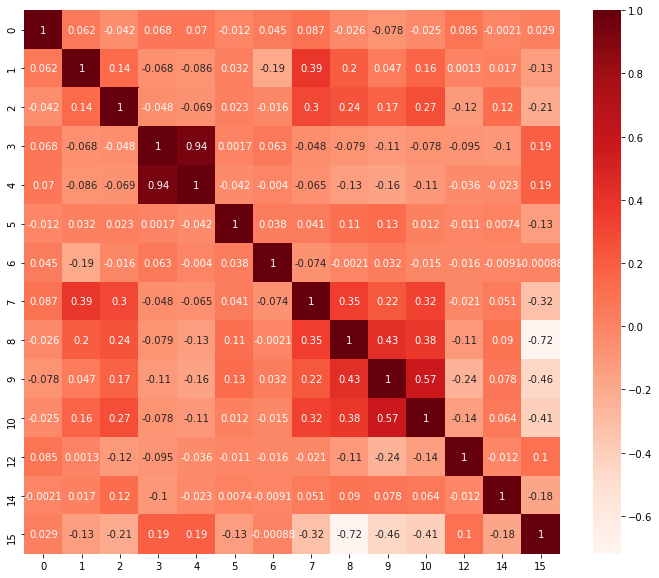

In [22]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = cc_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Observing the correlation plot we can say that the features are correlated to each other and since this is classification we can say generalized linear models perform well in these cases and hence we choose a Logistic Regression Model. 

### Making Predictions and Evaluating Performance

In [23]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [24]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_pred,y_test)


Accuracy of logistic regression classifier:  0.868421052631579


array([[ 88,  22],
       [  8, 110]])

### Improving the model performance using Grid Search CV

The above model performed very well with a model accuracy of about 87%.

Since there is always room for improvement, now we can try to improve upon the model performance by using grid search on the tol and max_iter hyperparameters of the logistic regression model

In [25]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [50,100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [50, 100, 150, 200]}


#### Instantiating GridSearchCV with our earlier <code>logreg</code> model

I have used GridSearchCV method because it is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

In [26]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator = logreg, param_grid= param_grid, cv = 5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 50, 'tol': 0.01}
